# Homework 5


Apply the EDA techniques we learnt today to `flights` dataset and write a short report.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

url = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/nyc_flights.csv'
flights = pd.read_csv(url)


## Flights Data

In [2]:
flights.head().T

0                     1  \
year                            2013                  2013   
month                              1                     1   
day                                1                     1   
dep_time                       517.0                 533.0   
sched_dep_time                   515                   529   
dep_delay                        2.0                   4.0   
arr_time                       830.0                 850.0   
sched_arr_time                   819                   830   
arr_delay                       11.0                  20.0   
carrier                           UA                    UA   
flight                          1545                  1714   
tailnum                       N14228                N24211   
origin                           EWR                   LGA   
dest                             IAH                   IAH   
air_time                       227.0                 227.0   
distance                        1400                  1416   
hour                               5                     5   
minute                            15                    29   
time_hour       2013-01-01T10:00:00Z  2013-01-01T10:00:00Z   

                                   2                     3  \
year                            2013                  2013   
month                              1                     1   
day                                1                     1   
dep_time                       542.0                 544.0   
sched_dep_time                   540                   545   
dep_delay                        2.0                  -1.0   
arr_time                       923.0                1004.0   
sched_arr_time                   850                  1022   
arr_delay                       33.0                 -18.0   
carrier                           AA                    B6   
flight                          1141                   725   
tailnum                       N619AA                N804JB   
origin                           JFK                   JFK   
dest                             MIA                   BQN   
air_time                       160.0                 183.0   
distance                        1089                  1576   
hour                               5                     5   
minute                            40                    45   
time_hour       2013-01-01T10:00:00Z  2013-01-01T10:00:00Z   

                                   4  
year                            2013  
month                              1  
day                                1  
dep_time                       554.0  
sched_dep_time                   600  
dep_delay                       -6.0  
arr_time                       812.0  
sched_arr_time                   837  
arr_delay                      -25.0  
carrier                           DL  
flight                           461  
tailnum                       N668DN  
origin                           LGA  
dest                             ATL  
air_time                       116.0  
distance                         762  
hour                               6  
minute                             0  
time_hour       2013-01-01T11:00:00Z

In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

## Data Transformation
##### Here, we will transform the data into more efficient data types
    -> like converting object into category

In [4]:
flights["carrier"] = flights.carrier.astype("category")

In [5]:
len(flights["tailnum"].unique())

4044

In [6]:
flights["origin"] = flights["origin"].astype("category")

In [7]:
flights["dest"] = flights["dest"].astype("category")

In [8]:
len(flights.time_hour.unique())

6936

In [9]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   year            336776 non-null  int64   
 1   month           336776 non-null  int64   
 2   day             336776 non-null  int64   
 3   dep_time        328521 non-null  float64 
 4   sched_dep_time  336776 non-null  int64   
 5   dep_delay       328521 non-null  float64 
 6   arr_time        328063 non-null  float64 
 7   sched_arr_time  336776 non-null  int64   
 8   arr_delay       327346 non-null  float64 
 9   carrier         336776 non-null  category
 10  flight          336776 non-null  int64   
 11  tailnum         334264 non-null  object  
 12  origin          336776 non-null  category
 13  dest            336776 non-null  category
 14  air_time        327346 non-null  float64 
 15  distance        336776 non-null  int64   
 16  hour            336776 non-null  int64

## Checking for NULL Values

In [10]:
print(flights.shape[0])
(flights.isna().sum()) / flights.shape[0]

336776


year              0.000000
month             0.000000
day               0.000000
dep_time          0.024512
sched_dep_time    0.000000
dep_delay         0.024512
arr_time          0.025872
sched_arr_time    0.000000
arr_delay         0.028001
carrier           0.000000
flight            0.000000
tailnum           0.007459
origin            0.000000
dest              0.000000
air_time          0.028001
distance          0.000000
hour              0.000000
minute            0.000000
time_hour         0.000000
dtype: float64

##### Here, since the proportion of null values is very less, we can simply remove the missing values by using dropna()

In [12]:
flights.dropna(inplace= True)
flights

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2013      1    1     517.0             515        2.0     830.0   
1       2013      1    1     533.0             529        4.0     850.0   
2       2013      1    1     542.0             540        2.0     923.0   
3       2013      1    1     544.0             545       -1.0    1004.0   
4       2013      1    1     554.0             600       -6.0     812.0   
...      ...    ...  ...       ...             ...        ...       ...   
336765  2013      9   30    2240.0            2245       -5.0    2334.0   
336766  2013      9   30    2240.0            2250      -10.0    2347.0   
336767  2013      9   30    2241.0            2246       -5.0    2345.0   
336768  2013      9   30    2307.0            2255       12.0    2359.0   
336769  2013      9   30    2349.0            2359      -10.0     325.0   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
0                  819       11.0      UA    1545  N14228    EWR  IAH   
1                  830       20.0      UA    1714  N24211    LGA  IAH   
2                  850       33.0      AA    1141  N619AA    JFK  MIA   
3                 1022      -18.0      B6     725  N804JB    JFK  BQN   
4                  837      -25.0      DL     461  N668DN    LGA  ATL   
...                ...        ...     ...     ...     ...    ...  ...   
336765            2351      -17.0      B6    1816  N354JB    JFK  SYR   
336766               7      -20.0      B6    2002  N281JB    JFK  BUF   
336767               1      -16.0      B6     486  N346JB    JFK  ROC   
336768            2358        1.0      B6     718  N565JB    JFK  BOS   
336769             350      -25.0      B6     745  N516JB    JFK  PSE   

        air_time  distance  hour  minute             time_hour  
0          227.0      1400     5      15  2013-01-01T10:00:00Z  
1          227.0      1416     5      29  2013-01-01T10:00:00Z  
2          160.0      1089     5      40  2013-01-01T10:00:00Z  
3          183.0      1576     5      45  2013-01-01T10:00:00Z  
4          116.0       762     6       0  2013-01-01T11:00:00Z  
...          ...       ...   ...     ...                   ...  
336765      41.0       209    22      45  2013-10-01T02:00:00Z  
336766      52.0       301    22      50  2013-10-01T02:00:00Z  
336767      47.0       264    22      46  2013-10-01T02:00:00Z  
336768      33.0       187    22      55  2013-10-01T02:00:00Z  
336769     196.0      1617    23      59  2013-10-01T03:00:00Z  

[327346 rows x 19 columns]

In [13]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   year            327346 non-null  int64   
 1   month           327346 non-null  int64   
 2   day             327346 non-null  int64   
 3   dep_time        327346 non-null  float64 
 4   sched_dep_time  327346 non-null  int64   
 5   dep_delay       327346 non-null  float64 
 6   arr_time        327346 non-null  float64 
 7   sched_arr_time  327346 non-null  int64   
 8   arr_delay       327346 non-null  float64 
 9   carrier         327346 non-null  category
 10  flight          327346 non-null  int64   
 11  tailnum         327346 non-null  object  
 12  origin          327346 non-null  category
 13  dest            327346 non-null  category
 14  air_time        327346 non-null  float64 
 15  distance        327346 non-null  int64   
 16  hour            327346 non-null  int64

## Visualization

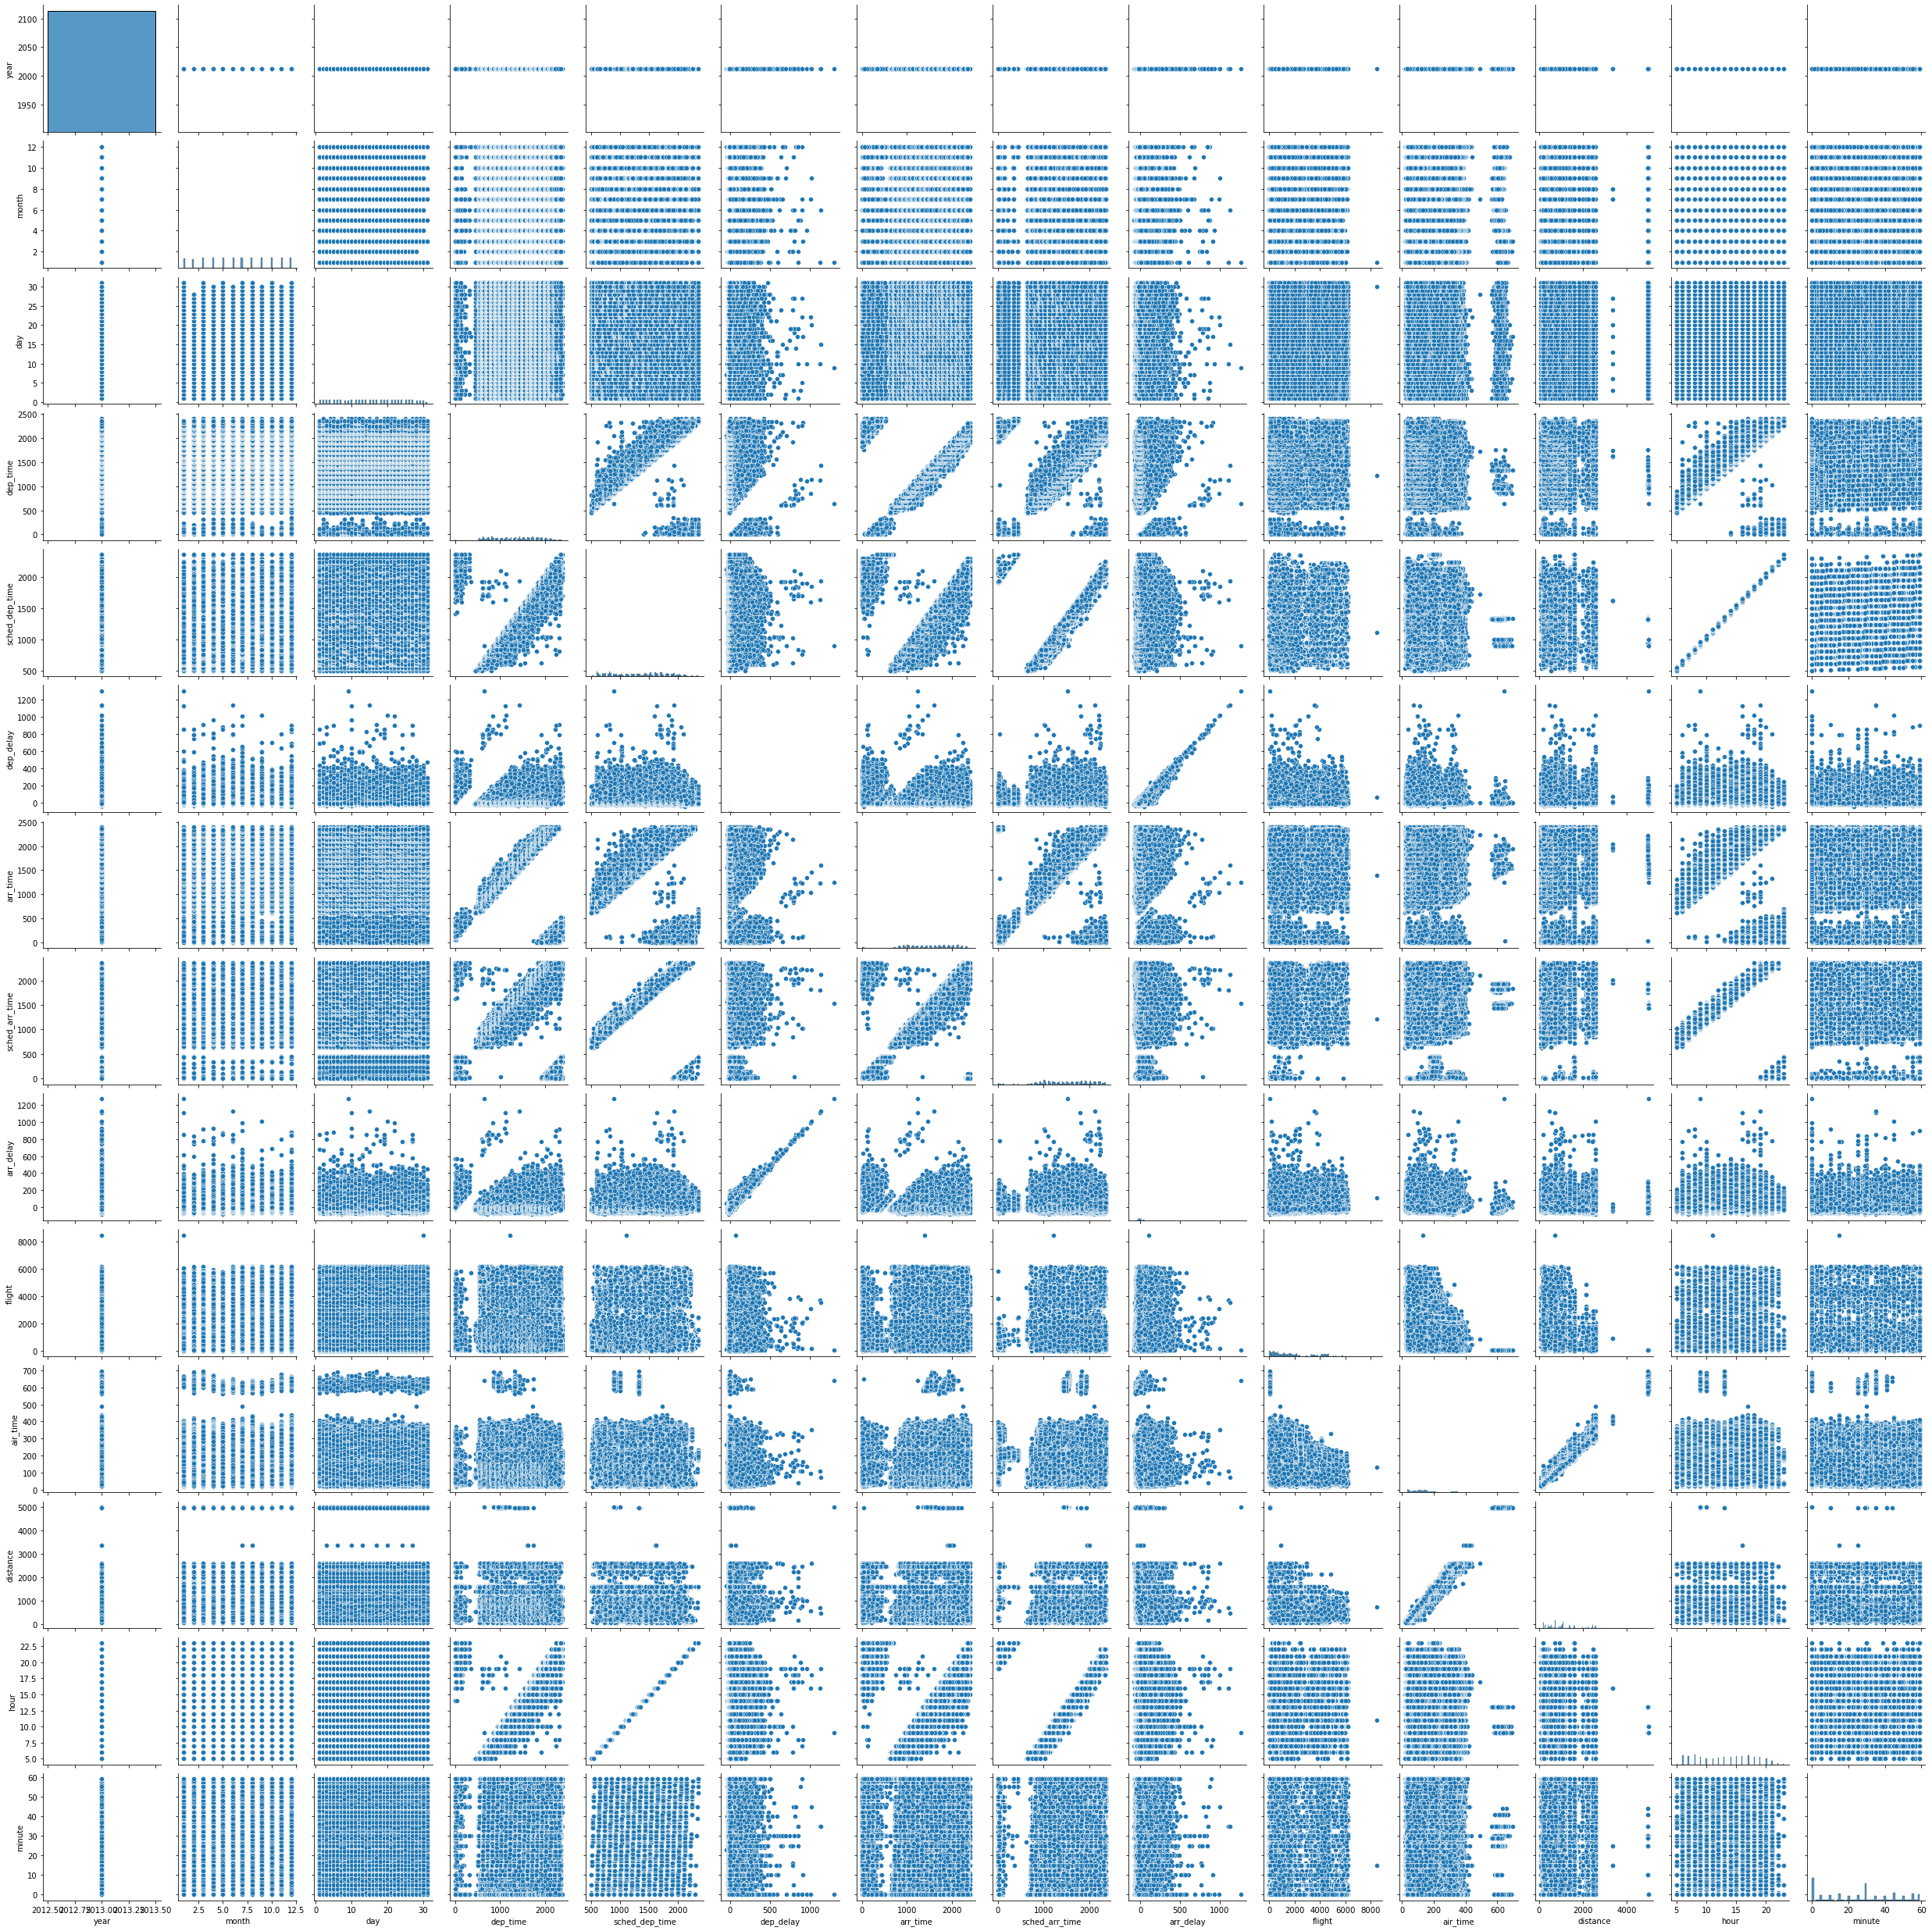

In [16]:
sns.pairplot(flights)

### Univariate Analysis

In [14]:
flights.carrier.value_counts()

UA    57782
B6    54049
EV    51108
DL    47658
AA    31947
MQ    25037
US    19831
9E    17294
WN    12044
VX     5116
FL     3175
AS      709
F9      681
YV      544
HA      342
OO       29
Name: carrier, dtype: int64

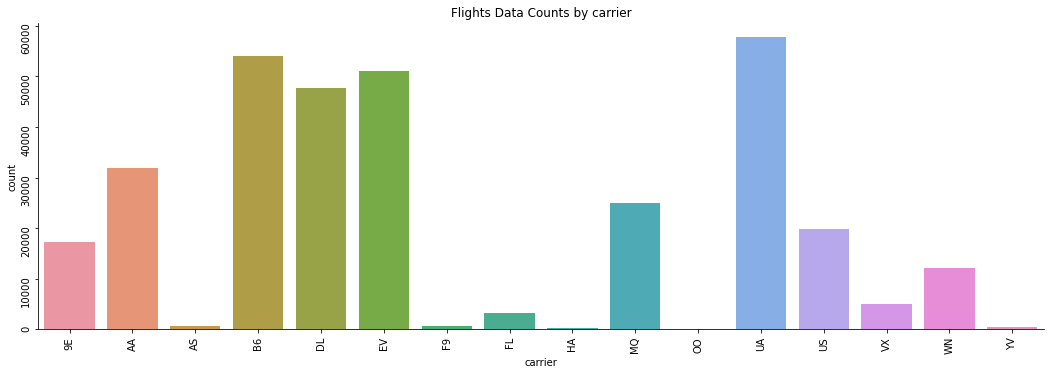

In [15]:
plot = sns.catplot(data= flights, kind = 'count', x = 'carrier', aspect = 3)
plot.ax.set_title('Flights Data Counts by carrier')
plot.ax.tick_params(labelrotation = 90)

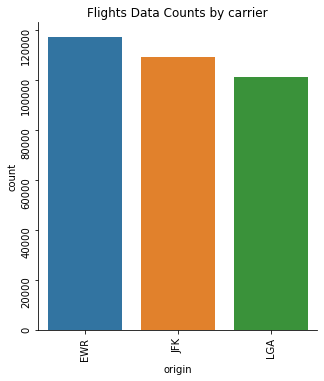

In [23]:
plot = sns.catplot(data= flights, kind = 'count', x = 'origin')
plot.ax.set_title('Flights Data Counts by carrier')
plot.ax.tick_params(labelrotation = 90)

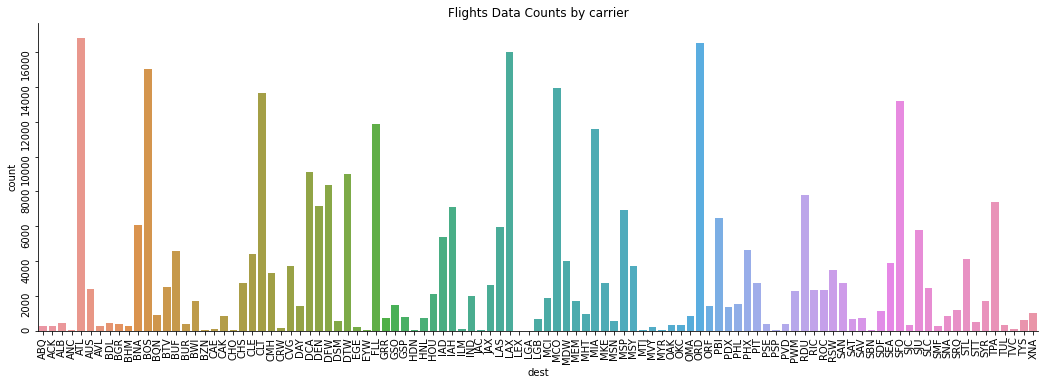

In [21]:
plot = sns.catplot(data= flights, kind = 'count',x = 'dest', aspect = 3)
plot.ax.set_title('Flights Data Counts by carrier')
plot.ax.tick_params(labelrotation = 90)

### Continuous Variables

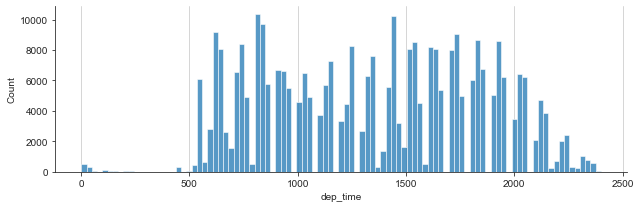

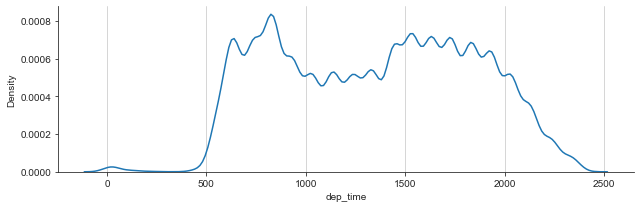

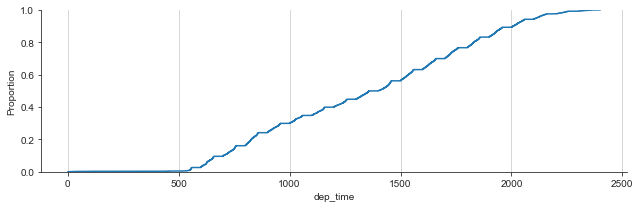

In [29]:
sns.set_style('ticks')

## we can use displot to see the distribution of 'carat' colum.
plot = sns.displot(data = flights, x= 'dep_time', kind = 'hist', height=3, aspect = 3)
plot.ax.grid(axis = 'x')

## or we can just take a look at the densities
plot = sns.displot(data = flights, x= 'dep_time', kind = 'kde', height= 3, aspect = 3)

## note that we can add a grid also
plot.ax.grid(axis = 'x')

plot = sns.displot(data = flights, x= 'dep_time', kind = 'ecdf', height= 3, aspect = 3)
plot.ax.grid(axis = 'x')

### Multivariate Distribution

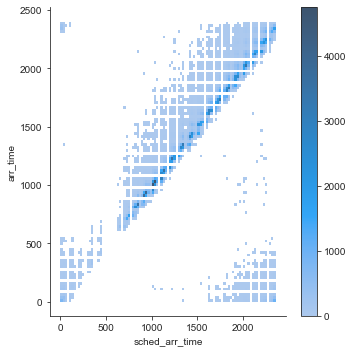

In [35]:
sns.displot(data= flights, x= 'sched_arr_time', y= 'arr_time', cbar= True)

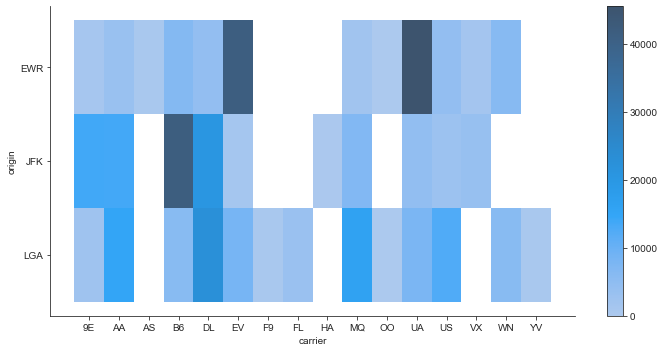

In [38]:
sns.displot(data= flights, x= 'carrier', y= 'origin', cbar= True, aspect= 2)

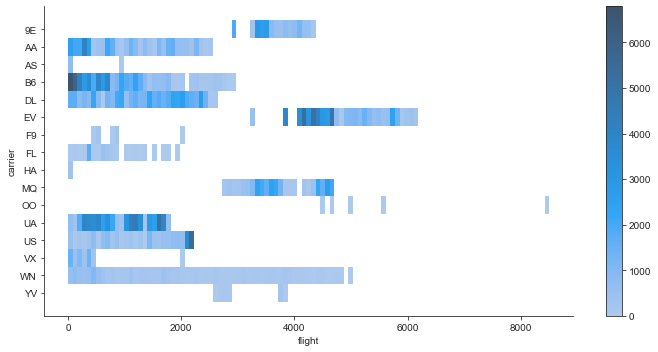

In [40]:
sns.displot(data= flights, x= 'flight', y= 'carrier', cbar= True, aspect= 2)